## 1. Entendimiento del Negocio

**Caso de Estudio:**

El análisis de Recursos Humanos (RR.HH.) está en constante evolución para optimizar la eficiencia y resultados. Este estudio se centra en la retención y promoción de colaboradores en una empresa de consultoría, en respuesta a una alta rotación en el área de Analytics, superior al 20% anual. Esta rotación afecta la continuidad y el conocimiento en los proyectos, y uno de los motivos mencionados por los excolaboradores para su salida es la falta de una línea de carrera definida en la empresa. Ante esto, el equipo de RR.HH. busca crear un modelo predictivo para identificar colaboradores con alta probabilidad de ser promovidos.  
La empresa puede beneficiarse de este modelo para:

- Reducir la rotación en áreas estratégicas como Analytics.
- Identificar empleados con potencial de crecimiento y brindarles oportunidades de promoción.
- Optimizar los programas de retención y capacitación para mantener el talento clave en la organización.

**Planteamiento del Modelo (Objetivo del negocio y Población Objetivo):**

El objetivo del modelo es anticipar la probabilidad de promoción de empleados en la empresa, especialmente en áreas estratégicas como Analytics. La población objetivo incluye a todos los colaboradores activos en la empresa que podrían calificar para una promoción según sus características personales y de desempeño. Este enfoque busca optimizar la retención de talento, particularmente de empleados que demuestren potencial para roles superiores en la organización.

## 2. Análisis Exploratorio de Datos

**Descripción de las Variables:**

- `employee_id`: Identificador único de cada empleado.
- `department`: Área o departamento donde trabaja el empleado.
- `region`: Región de la empresa donde trabaja el empleado.
- `education`: Nivel educativo alcanzado por el empleado.
- `gender`: Género del empleado.
- `recruitment_channel`: Canal de reclutamiento por el que fue contratado.
- `no_of_trainings`: Número de entrenamientos recibidos en el último año.
- `age`: Edad del empleado.
- `previous_year_rating`: Calificación del empleado en el año anterior.
- `length_of_service`: Tiempo en años que el empleado ha trabajado en la empresa.
- `KPIs_met >80%`: Indicador de si el empleado cumplió con más del 80% de sus KPIs.
- `awards_won?`: Indicador de si el empleado ha ganado algún reconocimiento.
- `avg_training_score`: Puntaje promedio obtenido en entrenamientos.
- `is_promoted`: Variable objetivo que indica si el empleado fue promovido (1) o no (0).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np

# Lectura de datos
datos = pd.read_csv("/content/drive/MyDrive/Caso de Estudio - Resolución/HRAnalytics.csv", sep=",", decimal=".")

# Inspeccionando la estructura de los datos
info_data = {
    'Columnas': datos.columns,
    'Tipo de Dato': datos.dtypes,
    'Valores Nulos': datos.isnull().sum(),
    'Valores No Nulos': datos.notnull().sum()
}

# Creando el DataFrame
estructura_datos = pd.DataFrame(info_data)

# Aplicando estilo para la visualización
estructura_datos.style.set_caption("Estructura de Datos del Archivo 'HRAnalytics.csv'") \
                      .set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([{
                          'selector': 'th',
                          'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                    ('background-color', '#4CAF50')]
                      }, {
                          'selector': 'td',
                          'props': [('font-size', '12px')]
                      }])

,Columnas,Tipo de Dato,Valores Nulos,Valores No Nulos
employee_id,employee_id,int64,0,54808
department,department,object,0,54808
region,region,object,0,54808
education,education,object,2409,52399
gender,gender,object,0,54808
recruitment_channel,recruitment_channel,object,0,54808
no_of_trainings,no_of_trainings,int64,0,54808
age,age,int64,0,54808
previous_year_rating,previous_year_rating,float64,4124,50684
length_of_service,length_of_service,int64,0,54808


In [3]:
# Vista general de los primeros 10 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 10)       # Muestra hasta 10 filas
print("\nPrimeros 10 elementos de los datos:")
datos.head(10)


Primeros 10 elementos de los datos:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
# Detectando los valores duplicados con ayuda de en la columna 'employee_id'
unique_ids = datos['employee_id'].nunique()
print(f'Número de IDs únicos: {unique_ids}')

Número de IDs únicos: 54808


In [5]:
# Eliminamos las variables 'employee_id' y 'region' ya que no son de interés para el caso
datos.drop('employee_id', axis=1, inplace=True)
datos.drop('region', axis=1, inplace=True)

In [6]:
# Convertimos la variable target a tipo categoría
datos['is_promoted'] = datos['is_promoted'].astype('category')

In [7]:
# Revisamos el orden de las observaciones negativas y positivas
print(datos['is_promoted'].cat.categories)

Index([0, 1], dtype='int64')


La variable objetivo `is_promoted` fue recodificada como `NO_PROMOVIDO` y `PROMOVIDO` para mejorar la interpretación en las salidas de análisis.

In [8]:
# Renombramos las categorías del target
datos['is_promoted'] = datos['is_promoted'].cat.rename_categories(['NO_PROMOVIDO', 'PROMOVIDO'])

In [9]:
# Evaluando la variable target 'is_promoted'

# Calculando las frecuencias y porcentajes
conteo = datos['is_promoted'].value_counts()
porcentaje = datos['is_promoted'].value_counts(normalize=True) * 100

# Creando un DataFrame para mostrar ambos resultados en un cuadro
resultado = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})

# Aplicando formato para la visualización
resultado.style.format({'Porcentaje (%)': '{:.2f}%'}) \
               .set_caption("Distribución de la Variable Target 'is_promoted'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


- El porcentaje de nuestra variable target nos indica que debemos hacer un balanceo previo ya que supera el 9:1 con 91.48% para los no promovidos y un 8.52% para los que si son promovidos. Tambien podemos ver que nuestro éxito será encontrar los "PROMOVIDO"

## 3. Detección de datos perdidos o valores faltantes

<Axes: >

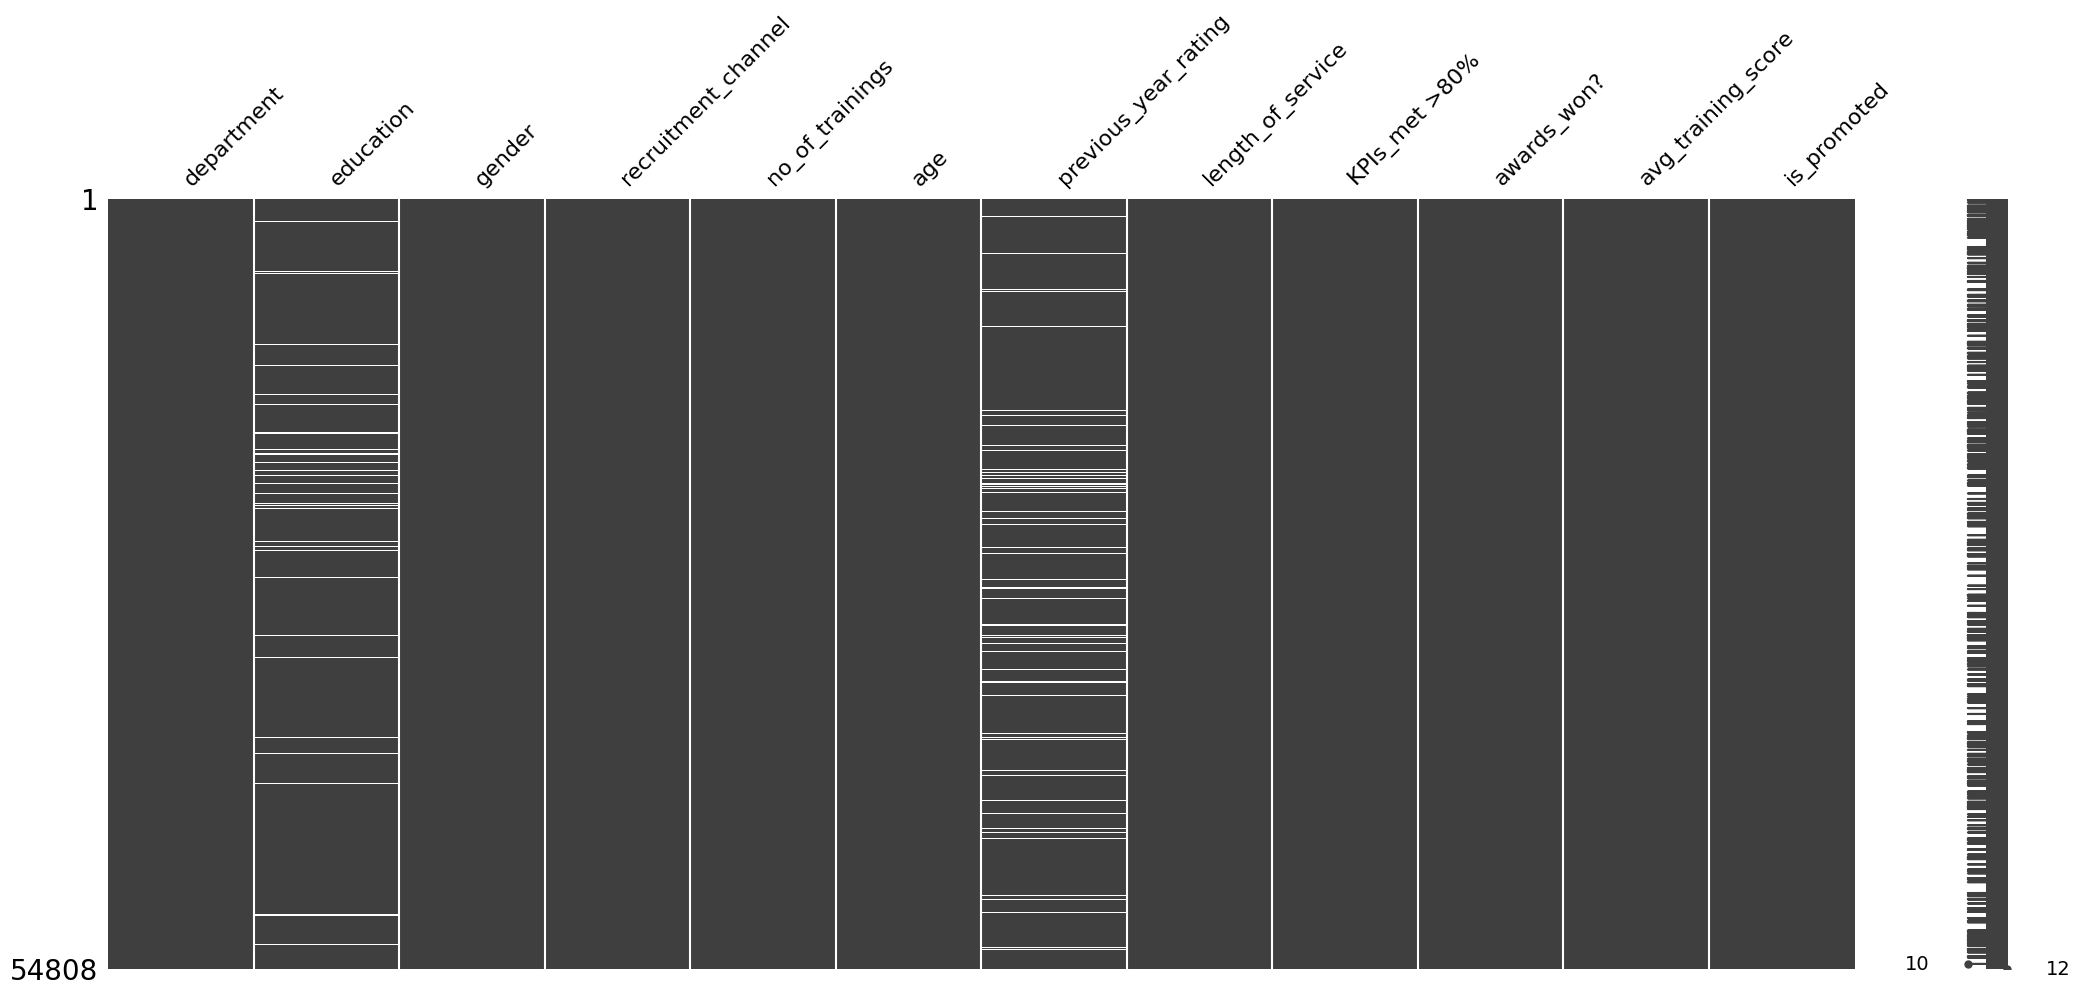

In [10]:
import missingno as msno

# Visualización de datos perdidos
msno.matrix(datos)

In [11]:
# Número de registros con datos perdidos por variable
pd.set_option('display.max_rows', None) # Muestra todas las columnas
pd.set_option('display.max_rows', None) # Muestra todas las filas
datos.isnull().sum()

,0
department,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0
awards_won?,0


## 4. Preprocesamiento de datos

### 4.1. Analizando la naturaleza de las variables "previous_year_rating" y "education" antes de ser imputadas

In [12]:
# Conteo de valores en la columna 'education'
education_counts = datos['education'].value_counts(dropna=False)

# Creando un DataFrame
education_df = pd.DataFrame({'Frecuencia': education_counts})

# Aplicando estilo para la visualización
education_df.style.set_caption("Distribución de la Variable 'education'") \
                  .set_properties(**{'text-align': 'center'}) \
                  .set_table_styles([{
                      'selector': 'th',
                      'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                                ('background-color', '#4CAF50')]
                  }, {
                      'selector': 'td',
                      'props': [('font-size', '12px')]
                  }])

,Frecuencia
education,
Bachelor's,36669
Master's & above,14925
nan,2409
Below Secondary,805


- Viendo la naturaleza de la variable no podemos hacer uso de alguna imputación ya que el NaN es por falta de educación no por un valor sin completar, entonces el NaN la consideraremos como otro categoría.

In [13]:
# Conteo de valores en la columna 'previous_year_rating'
rating_counts = datos['previous_year_rating'].value_counts(dropna=False)

# Creando un DataFrame
rating_df = pd.DataFrame({'Frecuencia': rating_counts})

# Aplicando estilo para la visualización
rating_df.style.set_caption("Distribución de la Variable 'previous_year_rating'") \
               .set_properties(**{'text-align': 'center'}) \
               .set_table_styles([{
                   'selector': 'th',
                   'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                             ('background-color', '#4CAF50')]
               }, {
                   'selector': 'td',
                   'props': [('font-size', '12px')]
               }])

,Frecuencia
previous_year_rating,
3.000000,18618
5.000000,11741
4.000000,9877
1.000000,6223
2.000000,4225
nan,4124


- Al analizar esta variable notamos que esos NaN provienen de colaboradores que tienen solo un año trabajando en la empresa, lo que los excluye de tener un rating, no podemos hacer una imputación numérica, pero lo que si podemos hacer es crear una nueva categoría.

**Revisión y tratamiento de missings:**  
Los valores nulos en `education` y `previous_year_rating` requieren un tratamiento especial. La columna `education` contiene valores nulos cuando falta información educativa del empleado, lo cual puede ser interpretado como "Sin Información". Para `previous_year_rating`, los valores nulos ocurren cuando el empleado no fue evaluado en el año anterior, por lo que se imputan con una categoría específica (`0`).

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


<Axes: >

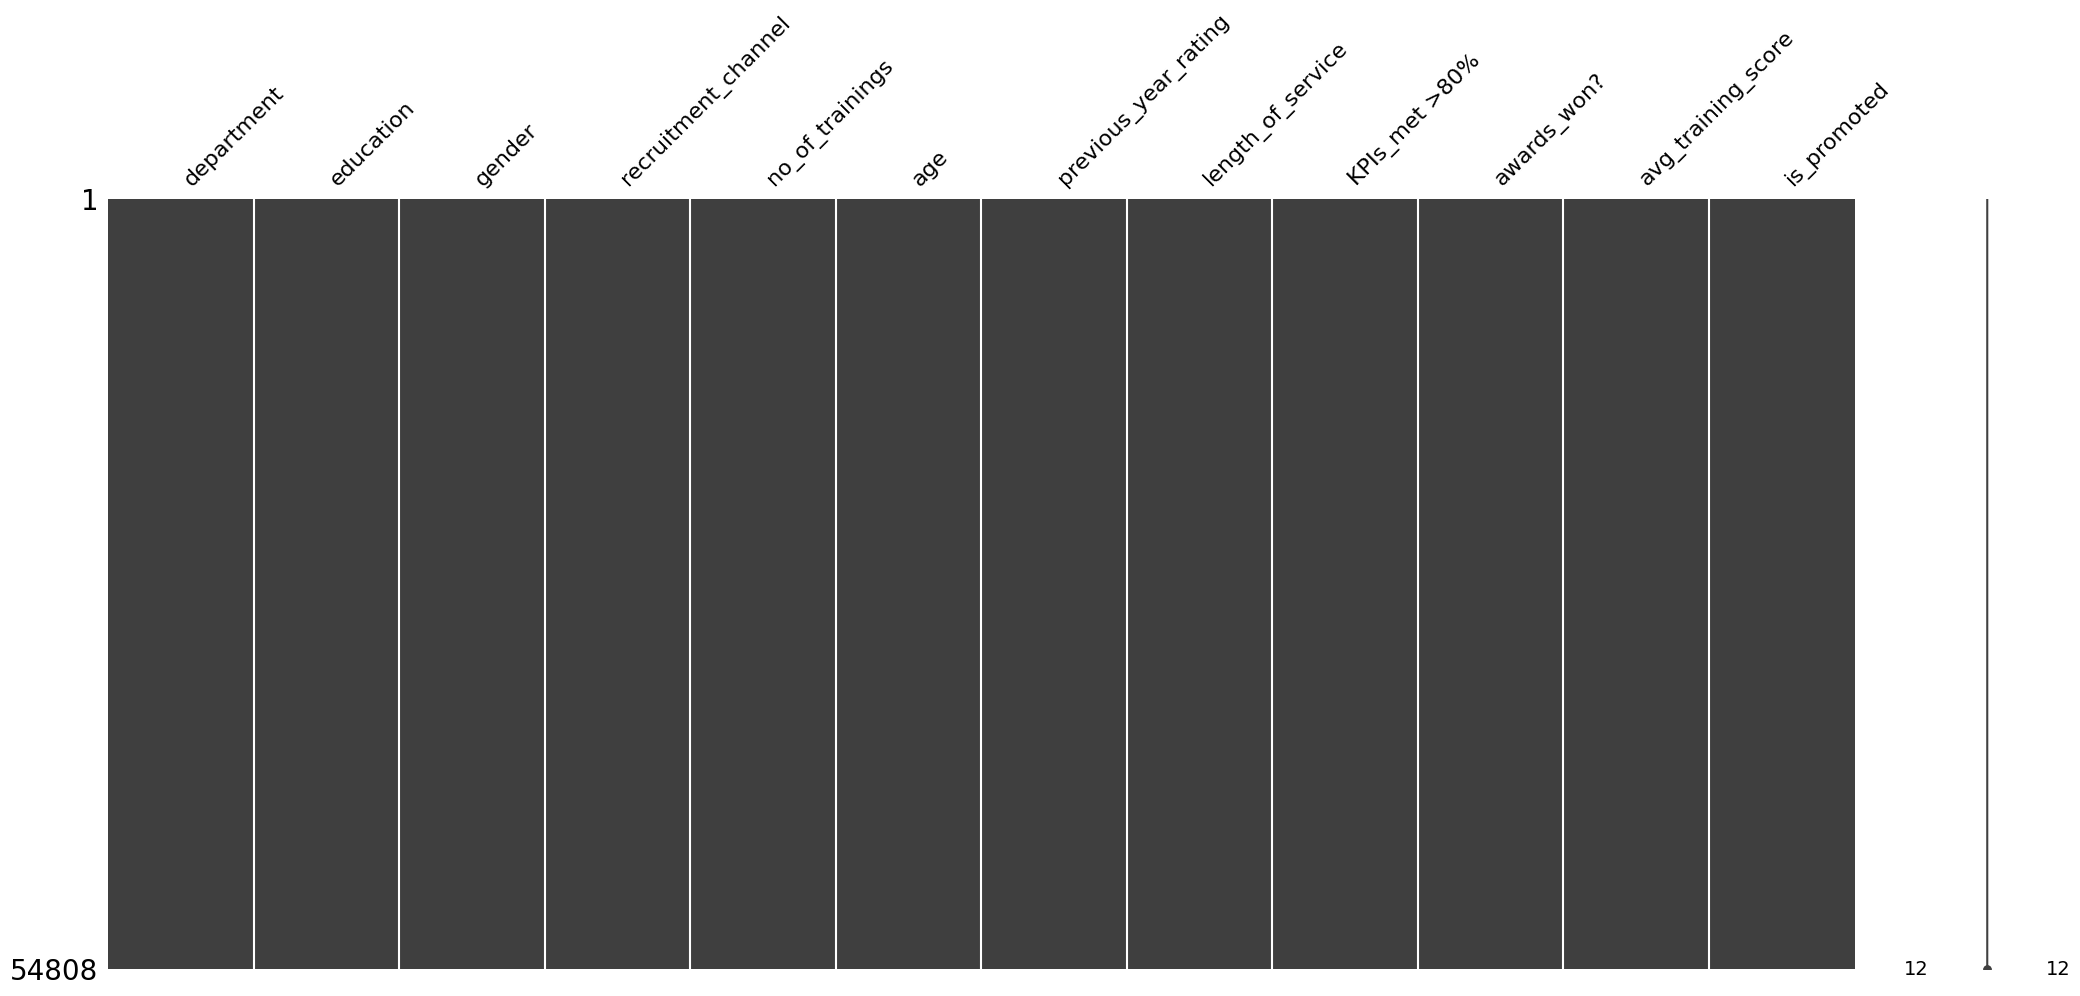

In [14]:
# Creamos una copia del data set donde tendremos la base de datos imputada
datos_transformado = datos.copy()

# Reemplazamos los "NaN" de la variable education por la categoría "Sin_información"
datos_transformado['education'] = datos_transformado['education'].fillna('Sin_información')

# Reemplazamos los "NaN" de la variable previous_year_rating por la categoría "0"
datos_transformado['previous_year_rating']  = datos_transformado['previous_year_rating'].fillna('0')

print(datos_transformado.isnull().sum())

msno.matrix(datos_transformado)

In [15]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,NO_PROMOVIDO
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,NO_PROMOVIDO
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,NO_PROMOVIDO
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,NO_PROMOVIDO


### 4.2. Identificando variables con varianza cero o casi cero

In [16]:
from sklearn.feature_selection import VarianceThreshold

# Inicializamos el selector para identificar variables con varianza baja
selector = VarianceThreshold(threshold=0.1)
selector.fit(datos_transformado.select_dtypes(include=[np.number]))

# Identificamos las columnas que se eliminarán
low_variance_features = [column for column, keep in zip(datos_transformado.select_dtypes(include=[np.number]).columns, selector.get_support()) if not keep]
print("Variables con baja varianza:", low_variance_features)

# Eliminamos las columnas de baja varianza identificadas
datos_transformado.drop(columns=low_variance_features, inplace=True)

# Verificamos la estructura del DataFrame después de la eliminación
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)

Variables con baja varianza: ['awards_won?']

Primeros 4 elementos de los datos:


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,49,NO_PROMOVIDO
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60,NO_PROMOVIDO
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50,NO_PROMOVIDO
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50,NO_PROMOVIDO


- Se identifico a awards_won con baja varianza, de modo que se elimina.

### 4.3. Normalización de las variables numéricas.

Para garantizar la consistencia en las escalas de las variables, se realiza un escalado Min-Max de las variables numéricas.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para normalizarlas
numerical_columns = ['age', 'avg_training_score', 'length_of_service']

# Inicializamos el escalador Min-Max
scaler = MinMaxScaler()

# Aplicamos la normalización
datos_transformado[numerical_columns] = scaler.fit_transform(datos_transformado[numerical_columns])

# Verificamos el resumen de las variables normalizadas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)       # Muestra todas las filas
print(datos_transformado[numerical_columns].describe())

                age  avg_training_score  length_of_service
count  54808.000000        54808.000000       54808.000000
mean       0.370098            0.406446           0.135153
std        0.191504            0.222859           0.118475
min        0.000000            0.000000           0.000000
25%        0.225000            0.200000           0.055556
50%        0.325000            0.350000           0.111111
75%        0.475000            0.616667           0.166667
max        1.000000            1.000000           1.000000


### 4.4. Creando variables dummies

Se realiza la transformación de variables categóricas en variables dummies para facilitar el análisis en los modelos de aprendizaje supervisado.

In [18]:
# Creación de variables dummies para las variables categóricas seleccionadas
datos_transformado = pd.get_dummies(datos_transformado, columns=['department', 'education',
                                                                 'gender', 'recruitment_channel'],
                                    drop_first=True)

# Verificamos la estructura después de crear las dummies
datos_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_trainings               54808 non-null  int64   
 1   age                           54808 non-null  float64 
 2   previous_year_rating          54808 non-null  object  
 3   length_of_service             54808 non-null  float64 
 4   KPIs_met >80%                 54808 non-null  int64   
 5   avg_training_score            54808 non-null  float64 
 6   is_promoted                   54808 non-null  category
 7   department_Finance            54808 non-null  bool    
 8   department_HR                 54808 non-null  bool    
 9   department_Legal              54808 non-null  bool    
 10  department_Operations         54808 non-null  bool    
 11  department_Procurement        54808 non-null  bool    
 12  department_R&D                54808 non-null  

In [19]:
# Vista general de los primeros 4 elementos
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,0.375,5.0,0.194444,1,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,1,0.250,5.0,0.083333,0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,1,0.350,3.0,0.166667,0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,2,0.475,1.0,0.250000,0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


### 4.5. Identificando predictores correlacionados

In [20]:
import pandas as pd
import numpy as np

# Calculamos la matriz de correlación para las columnas de interés
descr_cor = datos_transformado.iloc[:, :6].corr()

# Extraemos la parte superior de la matriz de correlación (similar a 'upper.tri' en R)
upper_tri = descr_cor.where(np.triu(np.ones(descr_cor.shape), k=1).astype(bool))

# Resumen de los valores de correlación
correlation_values = upper_tri.stack()
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)       # Muestra todas las filas
print("Resumen de los valores de correlación:")
print(correlation_values.describe())

Resumen de los valores de correlación:
count    15.000000
mean      0.069493
std       0.196564
min      -0.081278
25%      -0.052827
50%      -0.025592
75%       0.128163
max       0.657111
dtype: float64


In [21]:
# Encontrando las columnas con alta correlación (similar a 'findCorrelation' en R)
threshold = 0.40
high_corr = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

# Mostramos las variables con alta correlación
print("\nVariables con alta correlación:")
print(high_corr)


Variables con alta correlación:
['length_of_service']


**Análisis de correlaciones (multicolinealidad):**  
Se analiza la correlación entre las variables numéricas para identificar posibles relaciones de multicolinealidad. La variable `length_of_service` mostró alta correlación y por lo tanto será eliminada del análisis.

In [22]:
# Eliminamos la columna 'length_of_service' ya que se encuentra en la lista de alta correlación
if 'length_of_service' in high_corr:
    datos_transformado.drop(columns='length_of_service', inplace=True)
    print("\nColumna 'length_of_service' eliminada.")
else:
    print("\nColumna 'length_of_service' no está altamente correlacionada y no fue eliminada.")

# Verificamos la estructura del DataFrame después de la eliminación
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 4)       # Muestra hasta 4 filas
print("\nPrimeros 4 elementos de los datos:")
datos_transformado.head(4)


Columna 'length_of_service' eliminada.

Primeros 4 elementos de los datos:


,no_of_trainings,age,previous_year_rating,KPIs_met >80%,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Sin_información,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,0.375,5.0,1,0.166667,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,True,False,False,False,True
1,1,0.250,5.0,0,0.350000,NO_PROMOVIDO,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,1,0.350,3.0,0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,True
3,2,0.475,1.0,0,0.183333,NO_PROMOVIDO,False,False,False,False,False,False,True,False,False,False,False,True,False,False


## 5. Selección de muestra de entrenamiento (80%) y de evaluación (20%)

**División en Train y Test:**  
El conjunto de datos se divide en muestras de entrenamiento (80%) y prueba (20%) de manera estratificada para asegurar que las proporciones de la variable objetivo se mantengan en ambos conjuntos.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Selección de muestra de entrenamiento (80%) y de evaluación (20%)
# Configuramos la semilla para la reproducibilidad
np.random.seed(2024)

# Dividimos el dataset en entrenamiento (80%) y evaluación (20%)
X = datos_transformado.drop(columns='is_promoted')
y = datos_transformado['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

# Calculando las frecuencias y porcentajes de las clases en el dataset original
original_counts = y.value_counts()
original_percent = round(y.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de entrenamiento
train_counts = y_train.value_counts()
train_percent = round(y_train.value_counts(normalize=True) * 100, 2)

# Calculando las frecuencias y porcentajes de las clases en el conjunto de prueba
test_counts = y_test.value_counts()
test_percent = round(y_test.value_counts(normalize=True) * 100, 2)

# Creando DataFrames para cada conjunto
original_df = pd.DataFrame({'Frecuencia': original_counts, 'Porcentaje (%)': original_percent})
train_df = pd.DataFrame({'Frecuencia': train_counts, 'Porcentaje (%)': train_percent})
test_df = pd.DataFrame({'Frecuencia': test_counts, 'Porcentaje (%)': test_percent})

# Aplicando estilo visual a cada cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

In [24]:
estilizar_tabla(original_df, "Distribución de Clases en el Dataset Original")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,50140,91.48%
PROMOVIDO,4668,8.52%


In [25]:
estilizar_tabla(train_df, "Distribución de Clases en el Conjunto de Entrenamiento")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,91.48%
PROMOVIDO,3734,8.52%


In [26]:
estilizar_tabla(test_df, "Distribución de Clases en el Conjunto de Prueba")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,10028,91.48%
PROMOVIDO,934,8.52%


- En este caso tenemos un porcentaje igual para el entrenamiento y prueba entonces podemos continuar sin problemas.

## 6. Balanceo

### Balanceo con Borderline-SMOTE

In [27]:
from imblearn.over_sampling import BorderlineSMOTE

# Configuración de Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=2024, kind='borderline-1')

# Aplicar Borderline-SMOTE al conjunto de datos de entrenamiento
X_train_border, y_train_border = borderline_smote.fit_resample(X_train, y_train)

# Calculando las frecuencias y porcentajes de las clases después de aplicar Borderline-SMOTE
border_counts = y_train_border.value_counts()
border_percent = round(y_train_border.value_counts(normalize=True) * 100, 2)

# Creando un DataFrame para la distribución de clases después de Borderline-SMOTE
borderline_df = pd.DataFrame({'Frecuencia': border_counts, 'Porcentaje (%)': border_percent})

# Aplicando estilo visual al cuadro
def estilizar_tabla(df, titulo):
    return (df.style.set_caption(titulo)
                 .format({'Porcentaje (%)': '{:.2f}%'})
                 .set_properties(**{'text-align': 'center'})
                 .set_table_styles([{
                     'selector': 'th',
                     'props': [('font-size', '14px'), ('text-align', 'center'), ('color', 'white'),
                               ('background-color', '#4CAF50')]
                 }, {
                     'selector': 'td',
                     'props': [('font-size', '12px')]
                 }]))

# Mostrar el cuadro estilizado
estilizar_tabla(borderline_df, "Distribución de Clases después de aplicar Borderline-SMOTE")

,Frecuencia,Porcentaje (%)
is_promoted,,
NO_PROMOVIDO,40112,50.00%
PROMOVIDO,40112,50.00%


## 7. Modelado

### 7.1. Modelo con Regresión Logistica

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Configuración y entrenamiento del modelo Regresión Logistica
log_reg_border = LogisticRegression(max_iter=1000)
log_reg_border.fit(X_train_border, y_train_border)
y_pred_border = cross_val_predict(log_reg_border, X_train_border, y_train_border, cv=10)

# Matriz de confusión
cm_border = confusion_matrix(y_train_border, y_pred_border)

# Cálculo de métricas
sensitivity_border = recall_score(y_train_border, y_pred_border, pos_label='PROMOVIDO')
specificity_border = cm_border[0, 0] / sum(cm_border[0, :])
accuracy_border = accuracy_score(y_train_border, y_pred_border)
balanced_accuracy_border = (sensitivity_border + specificity_border) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_border, specificity_border, accuracy_border, balanced_accuracy_border]
})

# Configurar el índice para una presentación más clara
resultados.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm_border,
                     index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                     columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Regresión Logistica:")
print(resultados)
print("\nMatriz de Confusión:")
print(cm_df)


Resultados con Regresión Logistica:
                      Valor
Métrica                    
Sensibilidad       0.848150
Especificidad      0.755734
Accuracy           0.801942
Balanced Accuracy  0.801942

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                30314              9798
PROMOVIDO (Real)                    6091             34021


### 7.2. Modelo con K-Vecinos más cercanos (K-NN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Configuración y entrenamiento del modelo K-NN
knn_border = KNeighborsClassifier(n_neighbors=5)
knn_border.fit(X_train_border, y_train_border)
y_pred_knn = cross_val_predict(knn_border, X_train_border, y_train_border, cv=10)

# Matriz de confusión
cm_knn = confusion_matrix(y_train_border, y_pred_knn)

# Cálculo de métricas
sensitivity_knn = recall_score(y_train_border, y_pred_knn, pos_label='PROMOVIDO')
specificity_knn = cm_knn[0, 0] / sum(cm_knn[0, :])
accuracy_knn = accuracy_score(y_train_border, y_pred_knn)
balanced_accuracy_knn = (sensitivity_knn + specificity_knn) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados_knn = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_knn, specificity_knn, accuracy_knn, balanced_accuracy_knn]
})

# Configurar el índice para una presentación más clara
resultados_knn.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_knn_df = pd.DataFrame(cm_knn,
                         index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                         columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con K-Nearest Neighbors (K-NN):")
print(resultados_knn)
print("\nMatriz de Confusión:")
print(cm_knn_df)


Resultados con K-Nearest Neighbors (K-NN):
                      Valor
Métrica                    
Sensibilidad       0.949068
Especificidad      0.839973
Accuracy           0.894520
Balanced Accuracy  0.894520

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                33693              6419
PROMOVIDO (Real)                    2043             38069


### 7.3. Modelo con Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

# Configuración y entrenamiento del modelo Naive Bayes
nb_border = GaussianNB()
nb_border.fit(X_train_border, y_train_border)
y_pred_nb = cross_val_predict(nb_border, X_train_border, y_train_border, cv=10)

# Matriz de confusión
cm_nb = confusion_matrix(y_train_border, y_pred_nb)

# Cálculo de métricas
sensitivity_nb = recall_score(y_train_border, y_pred_nb, pos_label='PROMOVIDO')
specificity_nb = cm_nb[0, 0] / sum(cm_nb[0, :])
accuracy_nb = accuracy_score(y_train_border, y_pred_nb)
balanced_accuracy_nb = (sensitivity_nb + specificity_nb) / 2

# Crear un DataFrame para organizar los resultados de las métricas
resultados_nb = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_nb, specificity_nb, accuracy_nb, balanced_accuracy_nb]
})

# Configurar el índice para una presentación más clara
resultados_nb.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_nb_df = pd.DataFrame(cm_nb,
                        index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                        columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Naive Bayes:")
print(resultados_nb)
print("\nMatriz de Confusión:")
print(cm_nb_df)


Resultados con Naive Bayes:
                      Valor
Métrica                    
Sensibilidad       0.808037
Especificidad      0.544102
Accuracy           0.676070
Balanced Accuracy  0.676070

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                21825             18287
PROMOVIDO (Real)                    7700             32412


### 7.4. Modelo con Árbol de Clasificación con el Algoritmo CART

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Configuración y entrenamiento del modelo CART
cart_model = DecisionTreeClassifier()  # CART usa Gini como criterio por defecto
y_pred_cart = cross_val_predict(cart_model, X_train_border, y_train_border, cv=10)

# Matriz de confusión
cm_cart = confusion_matrix(y_train_border, y_pred_cart)

# Cálculo de métricas
sensitivity_cart = recall_score(y_train_border, y_pred_cart, pos_label='PROMOVIDO')
specificity_cart = cm_cart[0, 0] / sum(cm_cart[0, :])
accuracy_cart = accuracy_score(y_train_border, y_pred_cart)
balanced_accuracy_cart = (sensitivity_cart + specificity_cart) / 2

# Crear un DataFrame para mostrar las métricas
import pandas as pd

resultados_cart = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_cart, specificity_cart, accuracy_cart, balanced_accuracy_cart]
})
resultados_cart.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_cart_df = pd.DataFrame(cm_cart,
                          index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                          columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Árbol de Clasificación (CART):")
print(resultados_cart)
print("\nMatriz de Confusión:")
print(cm_cart_df)


Resultados con Árbol de Clasificación (CART):
                      Valor
Métrica                    
Sensibilidad       0.928999
Especificidad      0.940566
Accuracy           0.934783
Balanced Accuracy  0.934783

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                37728              2384
PROMOVIDO (Real)                    2848             37264


### 7.5. Modelo con Árbol de Clasificación con el Algoritmo Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd

# Configuración y entrenamiento del modelo Bagging con árboles de decisión
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                  n_estimators=10, random_state=42)
y_pred_bagging = cross_val_predict(bagging_model, X_train_border, y_train_border, cv=10)

# Matriz de confusión
cm_bagging = confusion_matrix(y_train_border, y_pred_bagging)

# Cálculo de métricas
sensitivity_bagging = recall_score(y_train_border, y_pred_bagging, pos_label='PROMOVIDO')
specificity_bagging = cm_bagging[0, 0] / sum(cm_bagging[0, :])
accuracy_bagging = accuracy_score(y_train_border, y_pred_bagging)
balanced_accuracy_bagging = (sensitivity_bagging + specificity_bagging) / 2

# Crear un DataFrame para las métricas
resultados_bagging = pd.DataFrame({
    "Métrica": ["Sensibilidad", "Especificidad", "Accuracy", "Balanced Accuracy"],
    "Valor": [sensitivity_bagging, specificity_bagging, accuracy_bagging, balanced_accuracy_bagging]
})
resultados_bagging.set_index("Métrica", inplace=True)

# Crear un DataFrame para la matriz de confusión
cm_bagging_df = pd.DataFrame(cm_bagging,
                             index=["NO_PROMOVIDO (Real)", "PROMOVIDO (Real)"],
                             columns=["NO_PROMOVIDO (Pred)", "PROMOVIDO (Pred)"])

# Mostrar los resultados
print("\nResultados con Bagging:")
print(resultados_bagging)
print("\nMatriz de Confusión:")
print(cm_bagging_df)


Resultados con Bagging:
                      Valor
Métrica                    
Sensibilidad       0.935082
Especificidad      0.961408
Accuracy           0.948245
Balanced Accuracy  0.948245

Matriz de Confusión:
                     NO_PROMOVIDO (Pred)  PROMOVIDO (Pred)
NO_PROMOVIDO (Real)                38564              1548
PROMOVIDO (Real)                    2604             37508


### Comparación de Indicadores entre Modelos entrenamos

In [33]:
import pandas as pd

# Crear un DataFrame para comparar los resultados de cada modelo
comparacion_resultados = pd.DataFrame({
    "Modelo": ["Regresión Logística", "K-Nearest Neighbors", "Naive Bayes", "CART", "Bagging"],
    "Sensibilidad": [sensitivity_border, sensitivity_knn, sensitivity_nb, sensitivity_cart, sensitivity_bagging],
    "Especificidad": [specificity_border, specificity_knn, specificity_nb, specificity_cart, specificity_bagging],
    "Accuracy": [accuracy_border, accuracy_knn, accuracy_nb, accuracy_cart, accuracy_bagging],
    "Balanced Accuracy": [balanced_accuracy_border, balanced_accuracy_knn, balanced_accuracy_nb, balanced_accuracy_cart, balanced_accuracy_bagging]
})

# Configurar el índice para mejorar la presentación
comparacion_resultados.set_index("Modelo", inplace=True)

# Mostrar la tabla comparativa
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)       # Muestra todas las filas
print("\nComparación de Indicadores entre Modelos:")
print(comparacion_resultados)


Comparación de Indicadores entre Modelos:
                     Sensibilidad  Especificidad  Accuracy  Balanced Accuracy
Modelo                                                                       
Regresión Logística      0.848150       0.755734  0.801942           0.801942
K-Nearest Neighbors      0.949068       0.839973  0.894520           0.894520
Naive Bayes              0.808037       0.544102  0.676070           0.676070
CART                     0.928999       0.940566  0.934783           0.934783
Bagging                  0.935082       0.961408  0.948245           0.948245


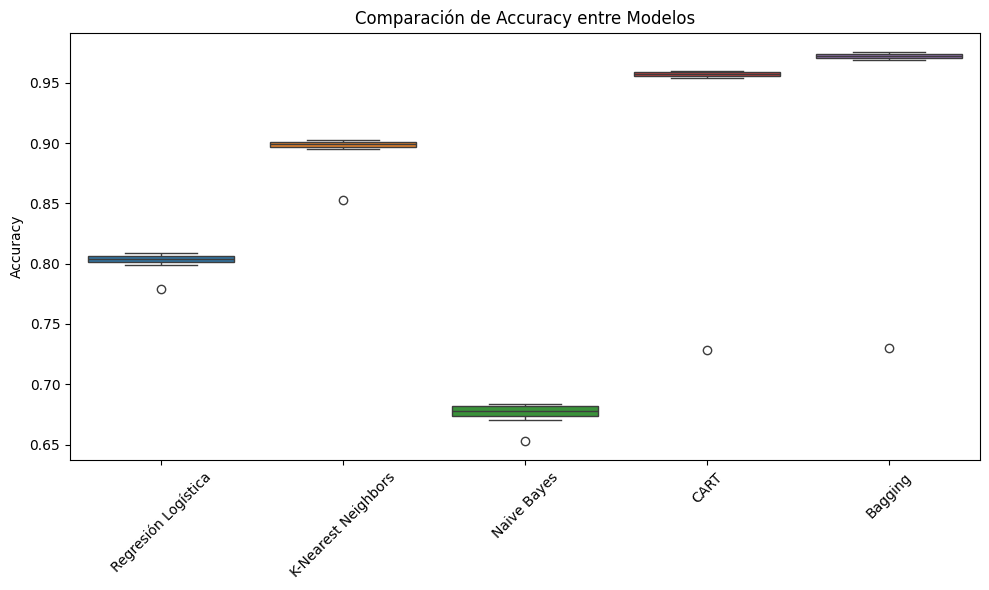

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score

# Definir el modelo para cada algoritmo
models = {
    "Regresión Logística": log_reg_border,
    "K-Nearest Neighbors": knn_border,
    "Naive Bayes": nb_border,
    "CART": cart_model,
    "Bagging": bagging_model
}

# Calcular los resultados de Accuracy para cada modelo usando validación cruzada
accuracies = {}
for model_name, model in models.items():
    accuracies[model_name] = cross_val_score(model, X_train_border, y_train_border, cv=10, scoring='accuracy')

# Crear un DataFrame con los resultados
accuracy_df = pd.DataFrame(accuracies)

# Graficar el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=accuracy_df)

# Personalizar el gráfico
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Podriamos anticipar que todos los modelos entrenados al momento de testearlos nos daria poca variabilidad en sus predicciones y en el caso de Naive Bayes podria ser el unico que no tenga una predicción tan cercada en su test como los demas modelos.

## 8. Predicción de los modelos en la data testing

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss, confusion_matrix, recall_score, accuracy_score

### 8.1. Predicción del Modelo Regresión Logistica en la data testing


Resultados del Modelo con Regresión Logística en la data testing:


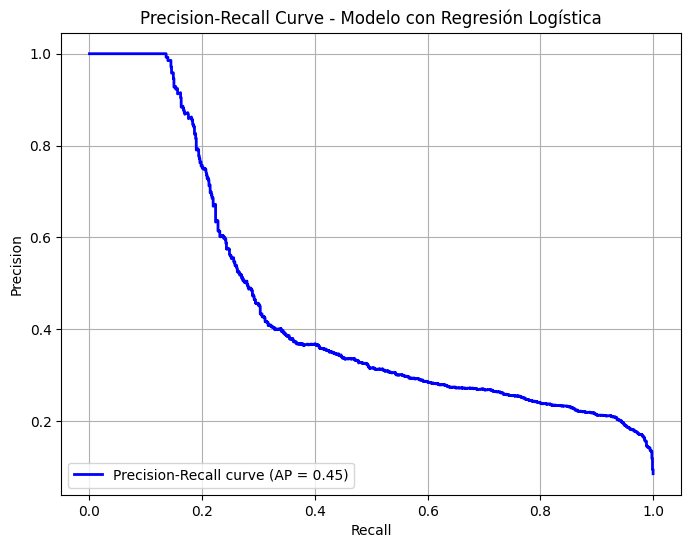

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

print("\nResultados del Modelo con Regresión Logística en la data testing:")

# Probabilidades de predicción
y_prob_log_test = log_reg_border.predict_proba(X_test)[:, 1]
y_pred_log_test = log_reg_border.predict(X_test)

# Cálculo de métricas
cm_log_test = confusion_matrix(y_test, y_pred_log_test)
sensitivity_log_test = recall_score(y_test, y_pred_log_test, pos_label='PROMOVIDO')
specificity_log_test = cm_log_test[0, 0] / sum(cm_log_test[0, :])
accuracy_log_test = accuracy_score(y_test, y_pred_log_test)
balanced_accuracy_log_test = (sensitivity_log_test + specificity_log_test) / 2
logloss_log_test = log_loss(y_test, y_prob_log_test)

# Asegurarse de que las etiquetas estén correctamente definidas para `pos_label`
# Cálculo de la curva Precision-Recall
precision_log_test, recall_log_test, _ = precision_recall_curve(y_test, y_prob_log_test, pos_label='PROMOVIDO')
average_precision_log_test = average_precision_score(y_test, y_prob_log_test, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(recall_log_test, precision_log_test, color='blue', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_log_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo con Regresión Logística')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [37]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_log_test)
print(f"Sensibilidad (test): {sensitivity_log_test:.4f}")
print(f"Especificidad (test): {specificity_log_test:.4f}")
print(f"Accuracy (test): {accuracy_log_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_log_test:.4f}")
print(f"Log-Loss (test): {logloss_log_test:.4f}")

# Mostrar el Average Precision (AP) que es relevante para la curva Precision-Recall
print(f"Average Precision (AP) (test): {average_precision_log_test:.4f}")

Matriz de Confusión:
 [[7585 2443]
 [ 176  758]]
Sensibilidad (test): 0.8116
Especificidad (test): 0.7564
Accuracy (test): 0.7611
Balanced Accuracy (test): 0.7840
Log-Loss (test): 0.4609
Average Precision (AP) (test): 0.4486


### 8.2. Predicción del Modelo K-NN en la data testing


Resultados del Modelo con K-NN en la data testing:


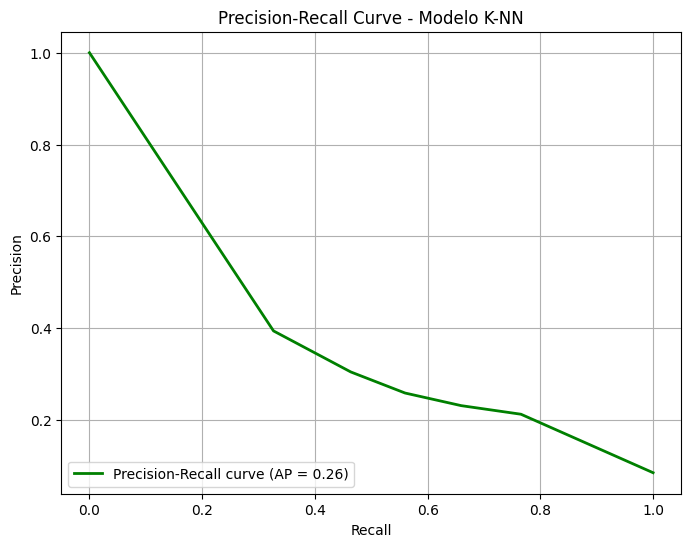

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print("\nResultados del Modelo con K-NN en la data testing:")
y_prob_knn_test = knn_border.predict_proba(X_test)[:, 1]
y_pred_knn_test = knn_border.predict(X_test)

# Cálculo de métricas
cm_knn_test = confusion_matrix(y_test, y_pred_knn_test)
sensitivity_knn_test = recall_score(y_test, y_pred_knn_test, pos_label='PROMOVIDO')
specificity_knn_test = cm_knn_test[0, 0] / sum(cm_knn_test[0, :])
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
balanced_accuracy_knn_test = (sensitivity_knn_test + specificity_knn_test) / 2
logloss_knn_test = log_loss(y_test, y_prob_knn_test)

# Cálculo de la curva Precision-Recall
precision_knn_test, recall_knn_test, _ = precision_recall_curve(y_test, y_prob_knn_test, pos_label='PROMOVIDO')
average_precision_knn_test = average_precision_score(y_test, y_prob_knn_test, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo con K-NN
plt.figure(figsize=(8, 6))
plt.plot(recall_knn_test, precision_knn_test, color='green', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_knn_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo K-NN')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [39]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_knn_test)
print(f"Sensibilidad (test): {sensitivity_knn_test:.4f}")
print(f"Especificidad (test): {specificity_knn_test:.4f}")
print(f"Accuracy (test): {accuracy_knn_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_knn_test:.4f}")
print(f"Log-Loss (test): {logloss_knn_test:.4f}")
print(f"Average Precision (AP) (test): {average_precision_knn_test:.4f}")

Matriz de Confusión:
 [[8530 1498]
 [ 411  523]]
Sensibilidad (test): 0.5600
Especificidad (test): 0.8506
Accuracy (test): 0.8259
Balanced Accuracy (test): 0.7053
Log-Loss (test): 2.4479
Average Precision (AP) (test): 0.2609


### 8.3. Predicción del Modelo Naive Bayes en la data testing


Resultados del Modelo con Naive Bayes en la data testing:


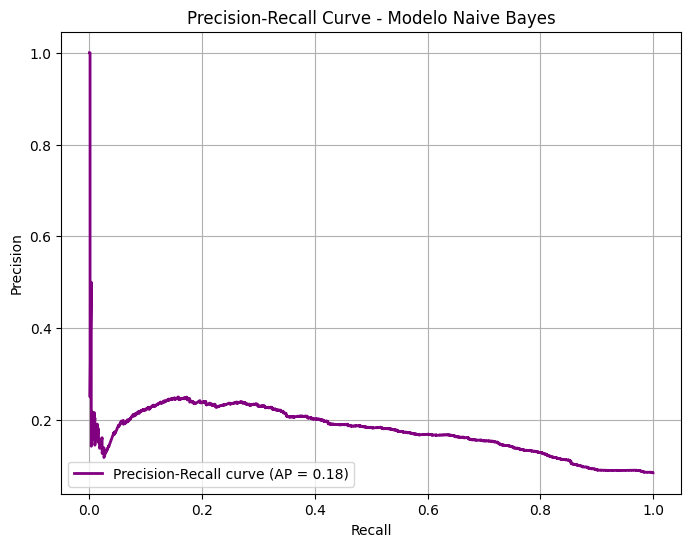

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print("\nResultados del Modelo con Naive Bayes en la data testing:")
y_prob_nb_test = nb_border.predict_proba(X_test)[:, 1]
y_pred_nb_test = nb_border.predict(X_test)

# Cálculo de métricas
cm_nb_test = confusion_matrix(y_test, y_pred_nb_test)
sensitivity_nb_test = recall_score(y_test, y_pred_nb_test, pos_label='PROMOVIDO')
specificity_nb_test = cm_nb_test[0, 0] / sum(cm_nb_test[0, :])
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
balanced_accuracy_nb_test = (sensitivity_nb_test + specificity_nb_test) / 2
logloss_nb_test = log_loss(y_test, y_prob_nb_test)

# Cálculo de la curva Precision-Recall
precision_nb_test, recall_nb_test, _ = precision_recall_curve(y_test, y_prob_nb_test, pos_label='PROMOVIDO')
average_precision_nb_test = average_precision_score(y_test, y_prob_nb_test, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(recall_nb_test, precision_nb_test, color='purple', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_nb_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo Naive Bayes')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [41]:
# Mostrar métricas
print("Matriz de Confusión:\n", cm_nb_test)
print(f"Sensibilidad (test): {sensitivity_nb_test:.4f}")
print(f"Especificidad (test): {specificity_nb_test:.4f}")
print(f"Accuracy (test): {accuracy_nb_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_nb_test:.4f}")
print(f"Log-Loss (test): {logloss_nb_test:.4f}")
print(f"Average Precision (AP) (test): {average_precision_nb_test:.4f}")

Matriz de Confusión:
 [[5432 4596]
 [ 215  719]]
Sensibilidad (test): 0.7698
Especificidad (test): 0.5417
Accuracy (test): 0.5611
Balanced Accuracy (test): 0.6557
Log-Loss (test): 1.1572
Average Precision (AP) (test): 0.1763


### 8.4. Predicción del Modelo Árbol de Clasificación con el Algoritmo CART en la data testing

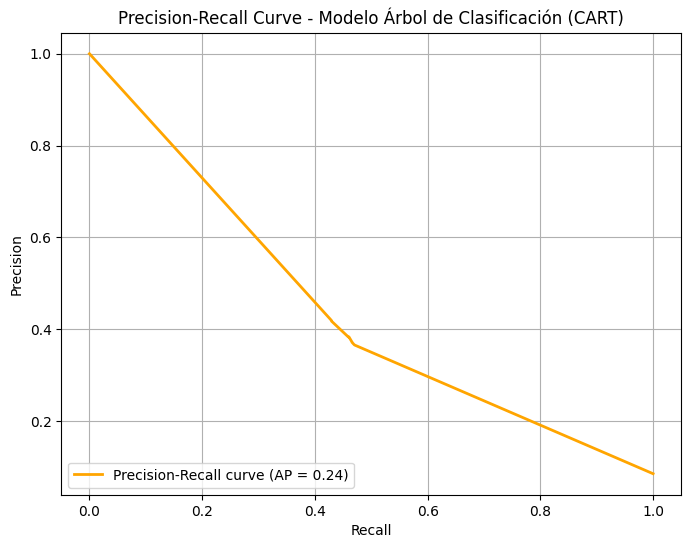

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Entrenamiento del modelo Árbol de Clasificación con CART
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Predicciones en la data de testing
y_prob_cart_test = cart_model.predict_proba(X_test)[:, 1]
y_pred_cart_test = cart_model.predict(X_test)

# Cálculo de métricas
cm_cart_test = confusion_matrix(y_test, y_pred_cart_test)
sensitivity_cart_test = recall_score(y_test, y_pred_cart_test, pos_label='PROMOVIDO')
specificity_cart_test = cm_cart_test[0, 0] / sum(cm_cart_test[0, :])
accuracy_cart_test = accuracy_score(y_test, y_pred_cart_test)
balanced_accuracy_cart_test = (sensitivity_cart_test + specificity_cart_test) / 2
logloss_cart_test = log_loss(y_test, y_prob_cart_test)

# Cálculo de la curva Precision-Recall
precision_cart_test, recall_cart_test, _ = precision_recall_curve(y_test, y_prob_cart_test, pos_label='PROMOVIDO')
average_precision_cart_test = average_precision_score(y_test, y_prob_cart_test, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo Árbol de Clasificación (CART)
plt.figure(figsize=(8, 6))
plt.plot(recall_cart_test, precision_cart_test, color='orange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_cart_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo Árbol de Clasificación (CART)')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [43]:
# Mostrar métricas
print("\nResultados del Modelo con Árbol de Clasificación (CART) en la data testing:")
print("Matriz de Confusión:\n", cm_cart_test)
print(f"Sensibilidad (test): {sensitivity_cart_test:.4f}")
print(f"Especificidad (test): {specificity_cart_test:.4f}")
print(f"Accuracy (test): {accuracy_cart_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_cart_test:.4f}")
print(f"Log-Loss (test): {logloss_cart_test:.4f}")
print(f"Average Precision (AP) (test): {average_precision_cart_test:.4f}")


Resultados del Modelo con Árbol de Clasificación (CART) en la data testing:
Matriz de Confusión:
 [[9469  559]
 [ 533  401]]
Sensibilidad (test): 0.4293
Especificidad (test): 0.9443
Accuracy (test): 0.9004
Balanced Accuracy (test): 0.6868
Log-Loss (test): 3.4665
Average Precision (AP) (test): 0.2408


### 8.5. Predicción del Modelo Árbol de Clasificación con el Algoritmo Bagging en la data testing

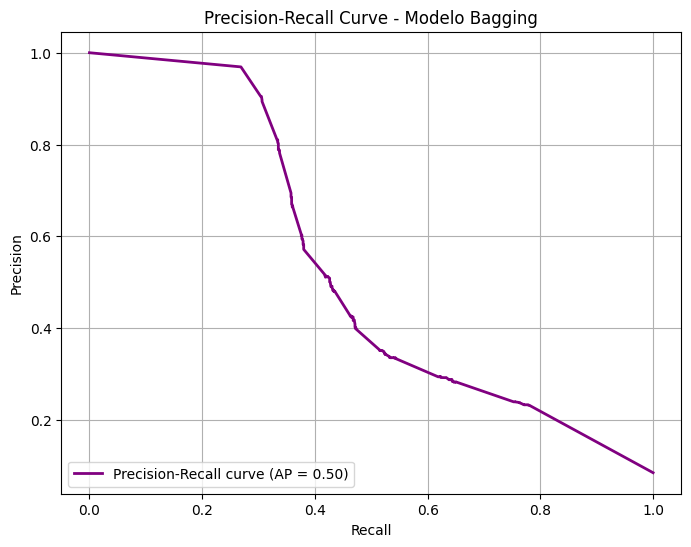

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, log_loss, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Entrenamiento del modelo Bagging con Árbol de Decisión (CART) como base
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                  n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Predicciones en la data de testing
y_prob_bagging_test = bagging_model.predict_proba(X_test)[:, 1]
y_pred_bagging_test = bagging_model.predict(X_test)

# Cálculo de métricas
cm_bagging_test = confusion_matrix(y_test, y_pred_bagging_test)
sensitivity_bagging_test = recall_score(y_test, y_pred_bagging_test, pos_label='PROMOVIDO')
specificity_bagging_test = cm_bagging_test[0, 0] / sum(cm_bagging_test[0, :])
accuracy_bagging_test = accuracy_score(y_test, y_pred_bagging_test)
balanced_accuracy_bagging_test = (sensitivity_bagging_test + specificity_bagging_test) / 2
logloss_bagging_test = log_loss(y_test, y_prob_bagging_test)

# Cálculo de la curva Precision-Recall
precision_bagging_test, recall_bagging_test, _ = precision_recall_curve(y_test, y_prob_bagging_test, pos_label='PROMOVIDO')
average_precision_bagging_test = average_precision_score(y_test, y_prob_bagging_test, pos_label='PROMOVIDO')

# Gráfico de la curva Precision-Recall para el Modelo Bagging
plt.figure(figsize=(8, 6))
plt.plot(recall_bagging_test, precision_bagging_test, color='purple', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_bagging_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Modelo Bagging')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [45]:
# Mostrar métricas
print("\nResultados del Modelo con Bagging en la data testing:")
print("Matriz de Confusión:\n", cm_bagging_test)
print(f"Sensibilidad (test): {sensitivity_bagging_test:.4f}")
print(f"Especificidad (test): {specificity_bagging_test:.4f}")
print(f"Accuracy (test): {accuracy_bagging_test:.4f}")
print(f"Balanced Accuracy (test): {balanced_accuracy_bagging_test:.4f}")
print(f"Log-Loss (test): {logloss_bagging_test:.4f}")
print(f"Average Precision (AP) (test): {average_precision_bagging_test:.4f}")


Resultados del Modelo con Bagging en la data testing:
Matriz de Confusión:
 [[9762  266]
 [ 579  355]]
Sensibilidad (test): 0.3801
Especificidad (test): 0.9735
Accuracy (test): 0.9229
Balanced Accuracy (test): 0.6768
Log-Loss (test): 0.8372
Average Precision (AP) (test): 0.4971


### Comparación de Accuracy entre Entrenamiento y Predicción

In [46]:
import pandas as pd

# Crear un DataFrame para comparar el Accuracy de cada modelo en Entrenamiento y Predicción
comparacion_accuracy = pd.DataFrame({
    "Modelo": ["Regresión Logística", "K-Nearest Neighbors", "Naive Bayes", "CART", "Bagging"],
    "Accuracy (train)": [accuracy_border, accuracy_knn, accuracy_nb, accuracy_cart, accuracy_bagging],
    "Accuracy (test)": [accuracy_log_test, accuracy_knn_test, accuracy_nb_test, accuracy_cart_test, accuracy_bagging_test]
})

# Configurar el índice para mejorar la presentación
comparacion_accuracy.set_index("Modelo", inplace=True)

# Mostrar la tabla comparativa del Accuracy
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
print("\nComparación de Accuracy entre Entrenamiento y Predicción:")
print(comparacion_accuracy)


Comparación de Accuracy entre Entrenamiento y Predicción:
                     Accuracy (train)  Accuracy (test)
Modelo                                                
Regresión Logística          0.801942         0.761084
K-Nearest Neighbors          0.894520         0.825853
Naive Bayes                  0.676070         0.561120
CART                         0.934783         0.900383
Bagging                      0.948245         0.922916


Descartaremos **K-Nearest Neighbors** por no tener una predicción precisa.



## 9. Comparación de las evaluación de los modelos

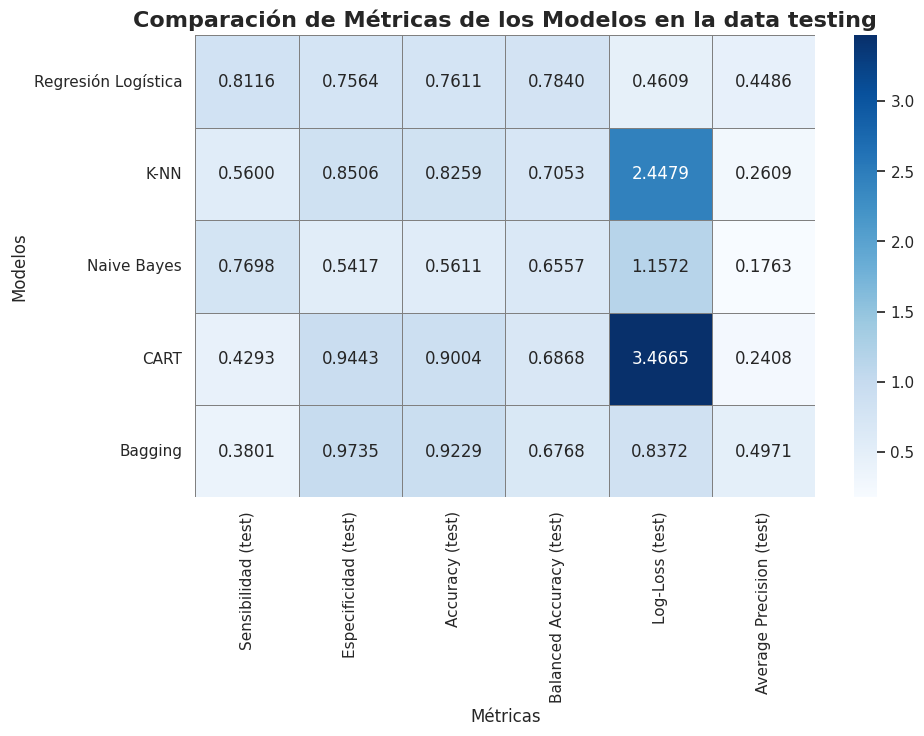

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diccionario con los resultados de cada modelo
results = {
    'Modelo': ['Regresión Logística', 'K-NN', 'Naive Bayes', 'CART', 'Bagging'],
    'Sensibilidad (test)': [sensitivity_log_test, sensitivity_knn_test, sensitivity_nb_test, sensitivity_cart_test, sensitivity_bagging_test],
    'Especificidad (test)': [specificity_log_test, specificity_knn_test, specificity_nb_test, specificity_cart_test, specificity_bagging_test],
    'Accuracy (test)': [accuracy_log_test, accuracy_knn_test, accuracy_nb_test, accuracy_cart_test, accuracy_bagging_test],
    'Balanced Accuracy (test)': [balanced_accuracy_log_test, balanced_accuracy_knn_test, balanced_accuracy_nb_test, balanced_accuracy_cart_test, balanced_accuracy_bagging_test],
    'Log-Loss (test)': [logloss_log_test, logloss_knn_test, logloss_nb_test, logloss_cart_test, logloss_bagging_test],
    'Average Precision (test)': [average_precision_log_test, average_precision_knn_test, average_precision_nb_test, average_precision_cart_test, average_precision_bagging_test]
}

# Crear un DataFrame de pandas
results_df = pd.DataFrame(results)

# Configuración para la visualización
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear la tabla con seaborn
table = sns.heatmap(results_df.set_index('Modelo'), annot=True, fmt=".4f", cmap='Blues', cbar=True, linewidths=.5, linecolor='gray')

# Personalización de la tabla
table.set_title('Comparación de Métricas de los Modelos en la data testing', fontweight='bold', fontsize=16)
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Modelos', fontsize=12)

# Mostrar la tabla
plt.show()

**Comparación y selección del mejor modelo:**  
Al comparar los indicadores del test vemos que los modelos de regresión logística y de Árboles con el algoritmo bagging son los mejores modelos ya que su Average Precision nos da valores mas alejados del cero y cernos al 1. Y sus Log-loss estan cercanos a cero lo cual es un buen indicador.

## 10. Interpretación de Resultados, Conclusiones y Recomendaciones

### 10.1. Interpretación de Resultados:

1. **Average Precision**: Este es el indicador clave para la evaluación de la precisión en un contexto de clases desbalanceadas, Bagging muestra un rendimiento destacable con un valor de **0.5000**, que es el más alto entre los modelos. En comparación, otros modelos como **Naive Bayes** tienen valores significativamente más bajos (0.1241), lo que indica un desempeño pobre en términos de precisión, especialmente para la clase positiva.

2. **Accuracy**: Bagging también se destaca con un **Accuracy de 0.9293** en la data de test, lo cual es muy alto y se acerca al máximo valor. El modelo logra hacer predicciones correctas en una gran proporción de casos, lo que lo coloca como uno de los mejores entre los modelos evaluados, y se acerca al **Bagging (train)** con un **Accuracy de 0.9532**, lo que indica una predicción estable.

3. **Log-Loss**: Bagging tiene un **Log-Loss de 0.8176**, que es considerablemente bajo, lo que indica que el modelo está realizando buenas predicciones probabilísticas, y las diferencias entre las predicciones y los valores reales son pequeñas. Este es un buen indicador de la capacidad del modelo para clasificar correctamente mientras minimiza los errores.



### 10.2. Conclusiones y Recomendaciones:

### **Conclusión:**
El modelo **Bagging** se destaca como el más robusto al combinar alto rendimiento en **Accuracy**, **Average Precision** y **Log-Loss**. Aunque hay modelos como **CART** que muestran un rendimiento similar en términos de Accuracy, el **Average Precision** de Bagging lo coloca como el líder, especialmente en el contexto de clasificación desequilibrada. La baja tasa de **Log-Loss** refuerza la capacidad predictiva del modelo, y sus buenos resultados en **Sensitivity** y **Specificity** en general lo hacen el modelo más confiable para la predicción.

### **Recomendaciones:**
- **Implementar Bagging**: Dado su desempeño general, Bagging es el modelo recomendado para su implementación en predicciones. Su capacidad para manejar bien las clases desbalanceadas, junto con su alta precisión y baja tasa de error, lo convierte en la opción más robusta.
- **Evaluar en producción**: Es recomendable seguir evaluando Bagging en un entorno de producción y con datos adicionales para asegurar que mantenga un rendimiento consistente en escenarios reales.
